The objectives of IPL data analysis is to derive insights from IPL data to improve the performance of teams and players, analyze the impact of different playing conditions on the outcome of matches.

In this project We have done analysis of the data of IPL from 2008 t0 2024 and drawn some of the insights.

In [10]:
# importing all the required pakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# importing the dataset

deliveries_dataset = r"../Datasets/deliveries.csv"
match_dataset = r"../Datasets/matches.csv"

deliveries_df = pd.DataFrame(pd.read_csv(deliveries_dataset))
matchs_df = pd.DataFrame(pd.read_csv(match_dataset))

In [12]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [13]:
matchs_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [14]:
deliveries_df.shape

(260920, 17)

In [15]:
matchs_df.shape

(1095, 20)

In [16]:
matchs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [17]:
deliveries_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [18]:
matchs_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [19]:
# Calculating the percentage of missing values in each column
missing_values_percentage = (deliveries_df.isna().sum() / len(deliveries_df)) * 100
print(missing_values_percentage)


match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batter               0.000000
bowler               0.000000
non_striker          0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
extras_type         94.586463
is_wicket            0.000000
player_dismissed    95.036793
dismissal_kind      95.036793
fielder             96.414993
dtype: float64


We have calculated the percentage of null values in our datasets.
So I have dropped following columns.

In [20]:
columns_to_drop = ['extras_type','player_dismissed','dismissal_kind', 'fielder']
deliveries_df = deliveries_df.drop(columns = columns_to_drop,axis=1)

In [21]:
deliveries_df.isna().sum()

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
extra_runs      0
total_runs      0
is_wicket       0
dtype: int64

Now there are no missing values in the table deliveries.

In [22]:
missing_values_percentage = matchs_df.isna().sum() 
print(missing_values_percentage)

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


We have calculated null values in another dataset matchs.
We can clearly see here method columns have more null values .
so we dropped methods and fill values in rest of the columns.

In [23]:
matchs_df = matchs_df.drop(columns="method",axis=1)

<Axes: ylabel='city'>

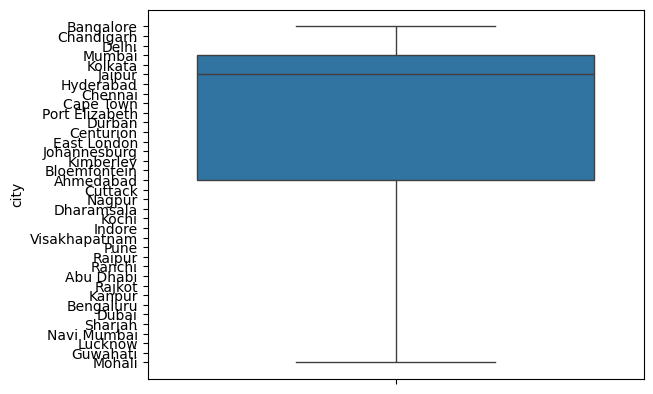

In [24]:
sns.boxplot(matchs_df.city)

Using seaborn,we are checking if there is any outlier.

In [25]:

city_mode = matchs_df['city'].mode()[0]
matchs_df['city'] = matchs_df['city'].fillna(city_mode) 

In [26]:

Player_mode = matchs_df['player_of_match'].mode()[0]
matchs_df['player_of_match']=matchs_df['player_of_match'].fillna(Player_mode)

In [27]:
matchs_df.dropna(inplace=True)

<Axes: ylabel='result_margin'>

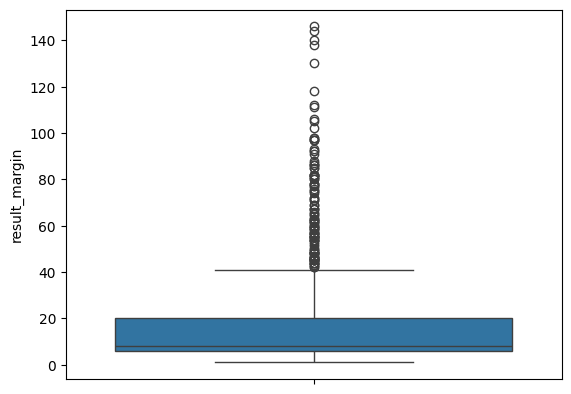

In [28]:
sns.boxplot(matchs_df.result_margin)

Using seaborn to check outlier in the data and filling the data accordingly.

In [29]:
result_median = matchs_df['result_margin'].median()
matchs_df['result_margin'] = matchs_df['result_margin'].fillna(result_median)

In [30]:
runs_mode = matchs_df['target_runs'].mode()[0]
matchs_df['target_runs'] = matchs_df['target_runs'].fillna(runs_mode)

In [31]:
overs_mode = matchs_df['target_overs'].mode()[0]
matchs_df['target_overs'] = matchs_df['target_overs'].fillna(overs_mode)

In [32]:
matchs_df.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

Now there are no missing values in the table matchs.


In [33]:
matchs_df['location'] = matchs_df['venue'] +", "+ matchs_df['city'] 

In [34]:
matchs_df['toss_summary'] = matchs_df['toss_winner'] +" elected to "+ matchs_df['toss_decision'] 

In [35]:
matchs_df['umpires'] = matchs_df['umpire1'] + " ,"+ matchs_df['umpire2'] 

In [36]:
matchs_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,location,toss_summary,umpires
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,"M Chinnaswamy Stadium, Bangalore",Royal Challengers Bangalore elected to field,"Asad Rauf ,RE Koertzen"
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,"Punjab Cricket Association Stadium, Mohali, Ch...",Chennai Super Kings elected to bat,"MR Benson ,SL Shastri"
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,"Feroz Shah Kotla, Delhi",Rajasthan Royals elected to bat,"Aleem Dar ,GA Pratapkumar"
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,"Wankhede Stadium, Mumbai",Mumbai Indians elected to bat,"SJ Davis ,DJ Harper"
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,"Eden Gardens, Kolkata",Deccan Chargers elected to bat,"BF Bowden ,K Hariharan"


In [37]:
matchs_df.season.value_counts()

season
2012       74
2022       74
2013       74
2023       73
2011       72
2024       71
2018       60
2016       60
2021       59
2009/10    59
2014       59
2007/08    58
2017       58
2019       57
2009       56
2015       56
2020/21    56
Name: count, dtype: int64

In [38]:
s = matchs_df.season.value_counts()
s

season
2012       74
2022       74
2013       74
2023       73
2011       72
2024       71
2018       60
2016       60
2021       59
2009/10    59
2014       59
2007/08    58
2017       58
2019       57
2009       56
2015       56
2020/21    56
Name: count, dtype: int64

In [39]:
x = s.index.to_list()
y = s.values
y.tolist()

[74, 74, 74, 73, 72, 71, 60, 60, 59, 59, 59, 58, 58, 57, 56, 56, 56]

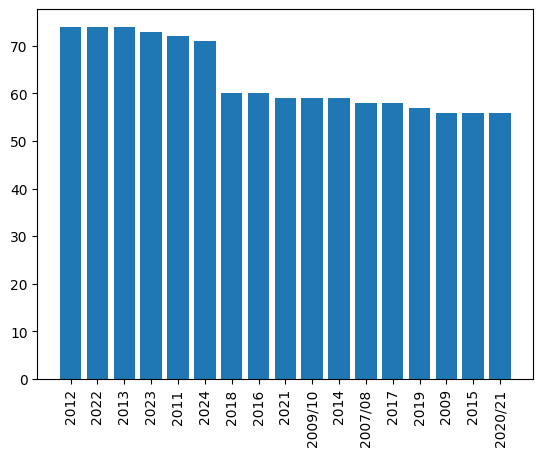

In [40]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In the above bar graph we have  conculded record of how many matches have  been played in which year.

In [41]:
matchs_df.sample()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,location,toss_summary,umpires
1002,1359527,2023,Kolkata,2023-05-08,League,AD Russell,"Eden Gardens, Kolkata",Punjab Kings,Kolkata Knight Riders,Punjab Kings,...,wickets,5.0,180.0,20.0,N,A Totre,J Madanagopal,"Eden Gardens, Kolkata, Kolkata",Punjab Kings elected to bat,"A Totre ,J Madanagopal"


In [42]:
s1=matchs_df.player_of_match.value_counts()[:10]


In [43]:
a = s1.index.to_list()
b = s1.values
b.tolist()

[24, 22, 19, 18, 17, 17, 16, 16, 15, 15]

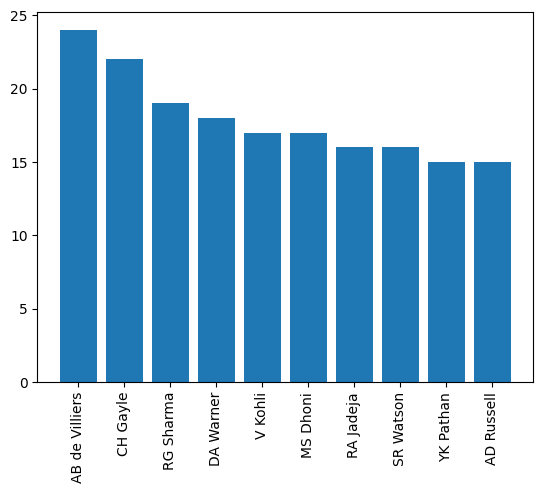

In [44]:
plt.bar(a,b)
plt.xticks(rotation=90)
plt.show()

In this graph,we can see that which player has won the most player of the match.

In [45]:
C=matchs_df.city.value_counts()[:10]

In [46]:

a = C.index.to_list()
b = C.values
b.tolist()

[220, 93, 88, 83, 76, 62, 61, 57, 51, 35]

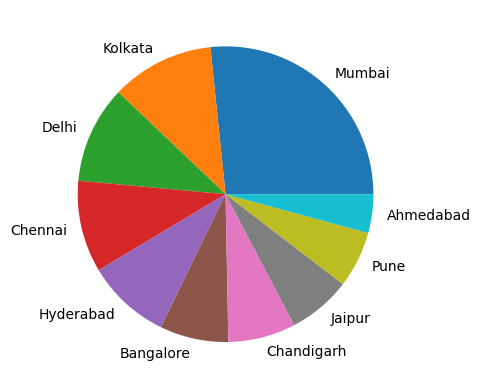

In [47]:
plt.pie(b,labels=a)
plt.show()

From this piechart,we can conclude that most of the matches has been played in which city.

In [48]:
A=matchs_df.groupby('city')['target_runs'].mean()[:20]

In [49]:

a = A.index.to_list()
b = A.values
b.tolist()

[159.97142857142856,
 170.74285714285713,
 167.24193548387098,
 190.07142857142858,
 136.0,
 130.16666666666666,
 155.91666666666666,
 168.65573770491804,
 165.289156626506,
 168.71428571428572,
 169.42045454545453,
 184.76923076923077,
 157.23076923076923,
 147.0,
 148.33333333333334,
 181.0,
 162.78947368421052,
 161.33333333333334,
 161.05263157894737,
 145.0]

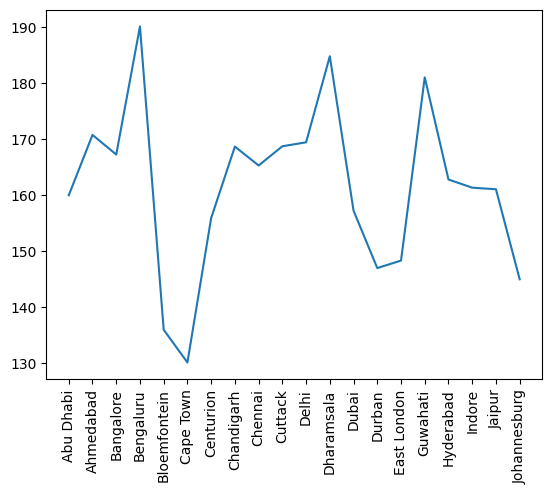

In [50]:
plt.plot(a,b)
plt.xticks(rotation=90)
plt.show()

In this line bar, we have shown that how much target runs are made based on the cities.

In [51]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,0
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,0
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,0
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,0


In [52]:
matchs_df.sample()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,location,toss_summary,umpires
529,980925,2016,Chandigarh,2016-04-19,League,RV Uthappa,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,6.0,139.0,20.0,N,S Ravi,C Shamshuddin,"Punjab Cricket Association IS Bindra Stadium, ...",Kolkata Knight Riders elected to field,"S Ravi ,C Shamshuddin"
